In [1]:
import torchaudio
import librosa
import numpy as np
import torch

In [22]:
x = np.random.rand(61,250)

In [23]:
print(x[3:6,3:6])

[[0.6370715  0.28345165 0.20198709]
 [0.1487942  0.99324182 0.96768794]
 [0.43814801 0.43414712 0.05758032]]


In [24]:
type(torch.from_numpy(x))
print(torch.from_numpy(x))

tensor([[0.0368, 0.2349, 0.0279,  ..., 0.5218, 0.3598, 0.4102],
        [0.2824, 0.5472, 0.7736,  ..., 0.9876, 0.5867, 0.4340],
        [0.0269, 0.4601, 0.2788,  ..., 0.1763, 0.2366, 0.3556],
        ...,
        [0.1934, 0.9378, 0.6714,  ..., 0.3368, 0.4425, 0.4577],
        [0.2308, 0.2622, 0.7335,  ..., 0.6692, 0.8244, 0.6436],
        [0.4598, 0.2744, 0.1990,  ..., 0.0276, 0.5045, 0.7606]],
       dtype=torch.float64)


### torchaudio.transforms.MelSpectrogram :  https://pytorch.org/audio/stable/transforms.html
```
torchaudio.transforms.MelSpectrogram(sample_rate: int = 16000, n_fft: int = 400, win_length: Optional[int] = None, hop_length: Optional[int] = None, f_min: float = 0.0, f_max: Optional[float] = None, pad: int = 0, n_mels: int = 128, window_fn: Callable[[...], torch.Tensor] = <built-in method hann_window of type object>, power: float = 2.0, normalized: bool = False, wkwargs: Optional[dict] = None, center: bool = True, pad_mode: str = 'reflect', onesided: bool = True, norm: Optional[str] = None, mel_scale: str = 'htk')
```

In [35]:
m = torchaudio.transforms.MelScale(n_mels=40,n_stft=61,mel_scale='slaney',norm ='slaney')
y1 = m(torch.from_numpy(x).float())
print(y1[3:6,3:6])
print(y1.shape)

tensor([[0.0042, 0.0085, 0.0015],
        [0.0049, 0.0022, 0.0015],
        [0.0038, 0.0017, 0.0012]])
torch.Size([40, 250])


### librosa.filters.mel : https://librosa.org/doc/main/generated/librosa.filters.mel.html
```
librosa.filters.mel(sr, n_fft, n_mels=128, fmin=0.0, fmax=None, htk=False, norm='slaney', dtype=<class 'numpy.float32'>)
```

In [36]:
mel_40_basis = librosa.filters.mel(sr=16000, n_fft=120, n_mels=40)
y2 = np.matmul(mel_40_basis,x)
print(y2[3:6,3:6])
print(np.shape(y2))

[[0.00423983 0.00845171 0.0015018 ]
 [0.00487533 0.00216918 0.00154575]
 [0.00378404 0.00168363 0.00119975]]
(40, 250)


In [ ]:
import matplotlib.pyplot as plt

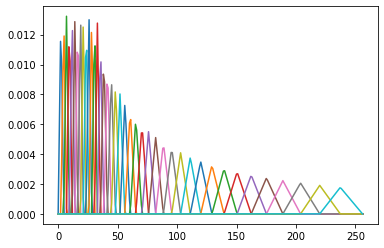

In [54]:
mel_40_basis = librosa.filters.mel(sr=16000, n_fft=512, n_mels=40)
for i in range(40):
    plt.plot(mel_40_basis[i,:])
plt.show()


In [55]:
np.max(mel_40_basis)

0.013230268

In [22]:
print(np.nonzero(mel_40_basis[0,:])[0].size)
print(np.nonzero(mel_40_basis[39,:])[0].size)

4
36


In [24]:
5//2

2

In [57]:
mel_f = [0,73.5701471088211,147.140294217642,220.710441326463,294.280588435284,367.850735544105,441.420882652927,514.991029761748,588.561176870569,662.131323979390,735.701471088211,809.271618197032,882.841765305853,956.411912414674,1031.40278025589,1112.70164651457,1200.40878098957,1295.02930636492,1397.10816090622,1507.23323686756,1626.03876627899,1754.20897361384,1892.48201637238,2041.65423627645,2202.58474555849,2376.20037475830,2563.50101052289,2765.56535415086,2983.55713404596,3218.73180785840,3472.44379291306,3746.15426656601,4041.43958141299,4360.00034381494,4703.67120802538,5074.43144232605,5474.41632802329,5905.92945695422,6371.45599832631,6873.67701129706,7415.48488572234,8000.00000000000]
fftfreqs = [0,31.2500000000000,62.5000000000000,93.7500000000000,125,156.250000000000,187.500000000000,218.750000000000,250,281.250000000000,312.500000000000,343.750000000000,375,406.250000000000,437.500000000000,468.750000000000,500,531.250000000000,562.500000000000,593.750000000000,625,656.250000000000,687.500000000000,718.750000000000,750,781.250000000000,812.500000000000,843.750000000000,875,906.250000000000,937.500000000000,968.750000000000,1000,1031.25000000000,1062.50000000000,1093.75000000000,1125,1156.25000000000,1187.50000000000,1218.75000000000,1250,1281.25000000000,1312.50000000000,1343.75000000000,1375,1406.25000000000,1437.50000000000,1468.75000000000,1500,1531.25000000000,1562.50000000000,1593.75000000000,1625,1656.25000000000,1687.50000000000,1718.75000000000,1750,1781.25000000000,1812.50000000000,1843.75000000000,1875,1906.25000000000,1937.50000000000,1968.75000000000,2000,2031.25000000000,2062.50000000000,2093.75000000000,2125,2156.25000000000,2187.50000000000,2218.75000000000,2250,2281.25000000000,2312.50000000000,2343.75000000000,2375,2406.25000000000,2437.50000000000,2468.75000000000,2500,2531.25000000000,2562.50000000000,2593.75000000000,2625,2656.25000000000,2687.50000000000,2718.75000000000,2750,2781.25000000000,2812.50000000000,2843.75000000000,2875,2906.25000000000,2937.50000000000,2968.75000000000,3000,3031.25000000000,3062.50000000000,3093.75000000000,3125,3156.25000000000,3187.50000000000,3218.75000000000,3250,3281.25000000000,3312.50000000000,3343.75000000000,3375,3406.25000000000,3437.50000000000,3468.75000000000,3500,3531.25000000000,3562.50000000000,3593.75000000000,3625,3656.25000000000,3687.50000000000,3718.75000000000,3750,3781.25000000000,3812.50000000000,3843.75000000000,3875,3906.25000000000,3937.50000000000,3968.75000000000,4000,4031.25000000000,4062.50000000000,4093.75000000000,4125,4156.25000000000,4187.50000000000,4218.75000000000,4250,4281.25000000000,4312.50000000000,4343.75000000000,4375,4406.25000000000,4437.50000000000,4468.75000000000,4500,4531.25000000000,4562.50000000000,4593.75000000000,4625,4656.25000000000,4687.50000000000,4718.75000000000,4750,4781.25000000000,4812.50000000000,4843.75000000000,4875,4906.25000000000,4937.50000000000,4968.75000000000,5000,5031.25000000000,5062.50000000000,5093.75000000000,5125,5156.25000000000,5187.50000000000,5218.75000000000,5250,5281.25000000000,5312.50000000000,5343.75000000000,5375,5406.25000000000,5437.50000000000,5468.75000000000,5500,5531.25000000000,5562.50000000000,5593.75000000000,5625,5656.25000000000,5687.50000000000,5718.75000000000,5750,5781.25000000000,5812.50000000000,5843.75000000000,5875,5906.25000000000,5937.50000000000,5968.75000000000,6000,6031.25000000000,6062.50000000000,6093.75000000000,6125,6156.25000000000,6187.50000000000,6218.75000000000,6250,6281.25000000000,6312.50000000000,6343.75000000000,6375,6406.25000000000,6437.50000000000,6468.75000000000,6500,6531.25000000000,6562.50000000000,6593.75000000000,6625,6656.25000000000,6687.50000000000,6718.75000000000,6750,6781.25000000000,6812.50000000000,6843.75000000000,6875,6906.25000000000,6937.50000000000,6968.75000000000,7000,7031.25000000000,7062.50000000000,7093.75000000000,7125,7156.25000000000,7187.50000000000,7218.75000000000,7250,7281.25000000000,7312.50000000000,7343.75000000000,7375,7406.25000000000,7437.50000000000,7468.75000000000,7500,7531.25000000000,7562.50000000000,7593.75000000000,7625,7656.25000000000,7687.50000000000,7718.75000000000,7750,7781.25000000000,7812.50000000000,7843.75000000000,7875,7906.25000000000,7937.50000000000,7968.75000000000,8000]

print(len(mel_f))
print(len(fftfreqs))

42
257


In [58]:
ans = np.subtract.outer(mel_f, fftfreqs)
ans.shape

(42, 257)

In [63]:
print(ans[0,:3])
print(ans[1,:3])
print(ans[41,:3])

[  0.   -31.25 -62.5 ]
[73.57014711 42.32014711 11.07014711]
[8000.   7968.75 7937.5 ]


In [41]:
fdiff = np.diff(mel_f)
fdiff.shape

(39,)

In [53]:
np.diff([0, 1, 2, 3, 2, 1, 0])

array([ 1,  1,  1, -1, -1, -1])

In [47]:
x = list(range(10))
print(x)
print(x[2:3])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[2]


In [50]:
x[:,np.newaxis]

TypeError: list indices must be integers or slices, not tuple

In [51]:
mel_40_basis

array([[-0.0000000e+00,  5.7736011e-03,  1.1547202e-02, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.8986780e-04,  9.4933901e-05,  0.0000000e+00]], dtype=float32)